# SRGAN (Super Resolution GAN)

## Initialization

In [ ]:
# Install required libraries
!pip install -q torch_snippets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 41.7 MB/s eta 0:0

In [ ]:
# Import libraries
import os

import torch
from torchvision import transforms as T
from torch_snippets import *

print(f"PyTorch Version: {torch.__version__}")
!nvidia-smi # check if GPU is available
%matplotlib inline

PyTorch Version: 2.2.1+cu121

Wed Apr 10 19:34:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on:", device)

Running on: cuda

<center>
<table>
    <thead>
        <tr>
            <th style="text-align: center;">SRGAN architecture</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="SRGAN.png" alt="SRGAN" height="500">
            </td>
        </tr>
    </tbody>
</table>
</center>

In [ ]:
# Download the pre-trained SRGAN model and the required modules
if not os.path.exists('srgan.pth.tar'):
    !wget -q https://raw.githubusercontent.com/sizhky/a-PyTorch-Tutorial-to-Super-Resolution/master/models.py -O models.py
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    downloaded = drive.CreateFile({'id': '1_PJ1Uimbr0xrPjE8U3Q_bG7XycGgsbVo'})
    downloaded.GetContentFile('srgan.pth.tar')

In [ ]:
# Load the pre-trained SRGAN model
model = torch.load('srgan.pth.tar', map_location='cpu')['generator'].to(device)
model.eval()

/content/models.py:255: SyntaxWarning: "is" with a literal. Did you mean "=="?
  out_channels = (n_channels if i is 0 else in_channels * 2) if i % 2 is 0 else in_channels
/content/models.py:255: SyntaxWarning: "is" with a literal. Did you mean "=="?
  out_channels = (n_channels if i is 0 else in_channels * 2) if i % 2 is 0 else in_channels
/content/models.py:258: SyntaxWarning: "is" with a literal. Did you mean "=="?
  stride=1 if i % 2 is 0 else 2, batch_norm=i is not 0, activation='LeakyReLu'))
/content/models.py:258: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  stride=1 if i % 2 is 0 else 2, batch_norm=i is not 0, activation='LeakyReLu'))
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:1113: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the cha

Generator(
  (net): SRResNet(
    (conv_block1): ConvolutionalBlock(
      (conv_block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
        (1): PReLU(num_parameters=1)
      )
    )
    (residual_blocks): Sequential(
      (0): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): PReLU(num_parameters=1)
          )
        )
        (conv_block2): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
      )
      (1): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Seque

In [10]:
# Download the test image
!wget https://www.cameraegg.org/wp-content/uploads/2015/06/canon-powershot-g3-x-sample-images-1.jpg -O low_res_image.jpg

--2024-04-10 19:44:30--  https://www.cameraegg.org/wp-content/uploads/2015/06/canon-powershot-g3-x-sample-images-1.jpg
Resolving www.cameraegg.org (www.cameraegg.org)... 199.189.224.162
Connecting to www.cameraegg.org (www.cameraegg.org)|199.189.224.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3033746 (2.9M) [image/jpeg]
Saving to: ‘low_res_image.jpg’

low_res_image.jpg   100%[===================>]   2.89M  2.03MB/s    in 1.4s    

2024-04-10 19:44:32 (2.03 MB/s) - ‘low_res_image.jpg’ saved [3033746/3033746]



In [11]:
# Define pre-processing and post-processing pipelines
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]), # ImageNet mean and std
    T.Lambda(lambda x: x.to(device))
])

postprocess = T.Compose([
    T.Lambda(lambda x: (x.cpu().detach()+1) / 2),
    T.ToPILImage()
])

In [19]:
# Load the image and preprocess it
image = readPIL('low_res_image.jpg')
print(f'Original image size: {image.size}')
image = image.resize((120, 80))
preprocessed_image = preprocess(image)
print(f'Processed image size: {image.size}')

Original image size: (3000, 2000)

Processed image size: (120, 80)

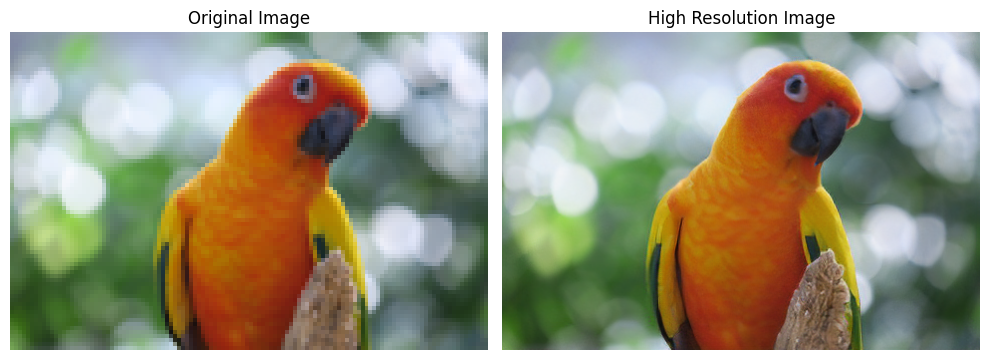

In [20]:
# Perform super-resolution on the image
sr_image = model(preprocessed_image[None])[0]
sr_image = postprocess(sr_image)

# Plot both the original and the super-resolved image
subplots([image, sr_image], nc=2, figsize=(10, 10), titles=['Original Image','High Resolution Image'])